###### Setup:

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.) Load Data

In [2]:
train_data = pd.read_csv('../../data/train.csv')
test_data = pd.read_csv('../../data/test.csv')

### 2.) Bird View

Let's take a peek at the top few rows:

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's explicitly set the `PassengerId` column as the index column:

In [4]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

Let's get more info from ***training data***; 
* How much data is missing?
* How many entries training data have?
* How many entries are there?

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Data Dictionary:**
| Variable | Definition | Key | DType | E.G. |
| -------- | ---------- | --- | ----- | ---- |
| `Survived` | Survival **(TARGET)** | 0 = No, 1 = Yes | int | 1 |
| `Pclass` | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | int | 1 |
| `Name` | Passengers name | | object | Braund, Mr. Owen Harris |
| `Sex` | Sex | 'male', 'female' | object | male |
| `Age` | Age in years| | float | 35.0 | 177 |
| `SibSp` | # of siblings / spouses aboard the Titanic | | int | 1 |
| `Parch` | # of parents / children aboard the Titanic | | int | 1 |
| `Ticket` | Ticket number | | object | PC 17599 |
| `Fare` | Passenger fare | | float | 71.2833 |
| `Cabin` | Cabin number | | object | C85 |
| `Embarked` | Port of Embarkation | C = Cherbourg,<br> Q = Queenstown,<br> S = Southampton | object | C |

**Variable Notes:**
* `Pclass`: A proxy for socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower
* `Age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* `Sibsp`: The dataset defines family relations in this way...
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
* `Parch`: The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them.

---


**NaN Value Count from training Data:**
* `Age` - 177
* `Cabin` - 687
* `Embarked` - 2

Okay, **`Age`** **`Cabin`** and **`Embarked`** has null values, especially `Cabin` feature 77% and `Age` feature 19% null. `Embarked` have almost none. How we will handle these NaN's?

For `Age` attribute we can use 
* median value or 
* we can use reasonable easy regression model for prediction (***Use this***)

For `Cabin` attribute: There is a lot of nulls here,
* Deleting the column -this probably not preferable-, or
* We can transfer deck letters (like A, B, C ...) from `Cabin` feature to another column, and we can predict the deck letters with creating a machine learning model based on the passenger's *age*, *gender* and *fare*. This could be a useful column for the model (**Use this**). or
* We can create column `known cabin`, if not null assign *yes* value, if null assign *no* value.

For `Embarked`
* We can use most_common approach, or 
* We can use simple classification for it (**Use This**)

---

Let's take a look at the numerical attributes:

In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


* Only 38% Survived. That's close enough to 40%, so ***accuracy*** will be a reasonable metric to evaluate our model.

**Controlling Skewness:**

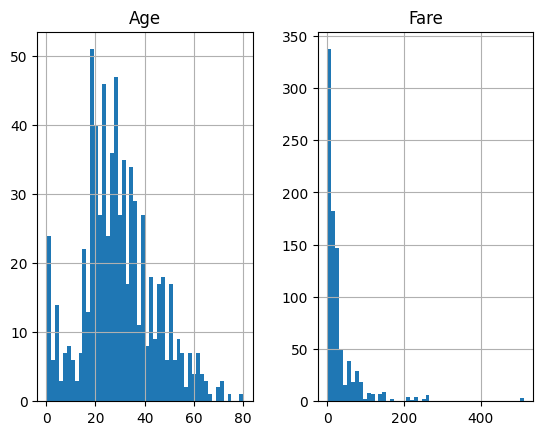

In [7]:
train_data.hist(column=['Age', 'Fare'], bins=50)
plt.show()

In [8]:
from scipy.stats import skew

# Calculate Skewness for 'Age'
age_skewness = skew(train_data['Age'].dropna())

# Calculate Skewness for 'Fare'
fare_skewness = skew(train_data['Fare'])

print("Age skewness:", age_skewness)
print("Fare skewness:", fare_skewness)

Age skewness: 0.3882898514698657
Fare skewness: 4.7792532923723545


* For `Fare`: It is a very high positive skewness value. This indicates that the distribution of ticket prices is significantly left-skewed, meaning that the majority of ticket prices are in the lower price ranges, (we will see that figure before)
  * We can transform with ***log*** calculation

* For `Age`: There are null values in this attribute, first we will handle those than we can decide what will happen. For now skewness not really bad.

---

In [9]:
train_data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

Let's check the target:

In [10]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

---

***Encoding:***

let's take a quick look at all the categorical attributes:

In [11]:
for attr in ['Pclass', 'Sex', 'Embarked']:
    print(f"{train_data[attr].value_counts()}\n")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



We can use **OrdinalEncoding** for `Pclass` and **OneHotEncoding** for `Sex` and `Embark` attributes

---

`Name` and `Ticket` attributes -- How we can use these. We will not use directly but can use for new features
* `Name`
  * Passenger titles can be transferred to another column.
  * Based on the passengers' surnames, the number of their families can be listed in a new column.
* `Ticket` attributes:
  * Contains more than one passenger with the same ticket number, they can be defined and a new column can be created.

---

In [13]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**New Feature Creation:**

**BrainStorming:**

Features on hand:
* `Pclass`
* `Name`
* `Sex`
* `Age`
* `SibSp`
* `Parch`
* `Ticket`
* `Fare` 
* `Cabin`

1. Can extract **Passenger_title** from `Name`
2. Can extract **Family_size** from `Name` using last names 
3. Can extract **Passenger_count_with_same_ticket** from `Ticket`
4. Can extract **Age_bucket** from `Age`
5. Can extract **Cabin_type** from `Cabin`
6. Can Engineer **Relative_on_board** from sum of `SibSp` and `Parch`

For now these came of my mind